<a href="https://colab.research.google.com/github/MolgaraTejakiran/opensource/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
dataset = pd.read_csv('fake_news_dataset.csv')

In [6]:
dataset.head()

,id,title,text,label
0,59,Scientists discover potential malaria vaccine,A collaborative study by multiple universities...,REAL
1,41,New metro line opens to the public,The city council voted unanimously to approve ...,REAL
2,35,University launches scholarship for underprivi...,The city council voted unanimously to approve ...,REAL
3,103,Government announces new education policy,The university announced a new scholarship pro...,REAL
4,185,University launches scholarship for underprivi...,A collaborative study by multiple universities...,REAL


In [7]:
dataset.shape

(200, 4)

In [8]:
#checking empty values
dataset.isna().sum()

,0
id,0
title,0
text,0
label,0


In [10]:
dataset.dropna(axis = 0,inplace = True)

In [11]:
dataset.isna().sum()

,0
id,0
title,0
text,0
label,0


In [12]:
dataset

,id,title,text,label
0,59,Scientists discover potential malaria vaccine,A collaborative study by multiple universities...,REAL
1,41,New metro line opens to the public,The city council voted unanimously to approve ...,REAL
2,35,University launches scholarship for underprivi...,The city council voted unanimously to approve ...,REAL
3,103,Government announces new education policy,The university announced a new scholarship pro...,REAL
4,185,University launches scholarship for underprivi...,A collaborative study by multiple universities...,REAL
...,...,...,...,...
195,134,Time traveler spotted in city council meeting,A chain message states that all smartphones wi...,FAKE
196,138,Secret lab creates invisibility potion sold on...,A viral post claims that world leaders signed ...,FAKE
197,73,Tech company releases quarterly earnings report,Commuters welcomed the opening of the new metr...,REAL
198,141,Government announces new education policy,The government today unveiled a comprehensive ...,REAL


In [13]:
dataset.reset_index(inplace = True)

<Axes: xlabel='count', ylabel='label'>

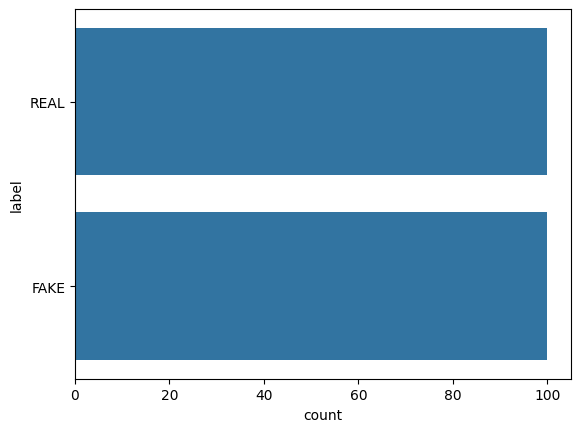

In [14]:
#balanced data or imbalanced
sns.countplot(dataset['label'])

In [16]:
data = dataset['title'][0]

In [ ]:
#regular expression
import re

In [19]:
import re
data = re.sub('[^a-zA-Z]', ' ' , data)

'Scientists discover potential malaria vaccine'

In [20]:
#changing to lower case
data = data.lower()
data

'scientists discover potential malaria vaccine'

In [21]:
#split the text
list = data.split()
list

['scientists', 'discover', 'potential', 'malaria', 'vaccine']

In [22]:
import nltk

In [23]:
#remove the stopwords from the text if any
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#remove the stopwords from the text if any
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

review = [ps.stem(word) for word in list if not word in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
review

['scientist', 'discov', 'potenti', 'malaria', 'vaccin']

In [28]:
' '.join(review)

'scientist discov potenti malaria vaccin'

In [29]:
corpus = []
for i in range(0,len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['title'][i])
    review = review.lower()
    list = review.split()
    review = [ps.stem(word) for word in list if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [30]:
corpus[0]

'scientist discov potenti malaria vaccin'

In [31]:
corpus

['scientist discov potenti malaria vaccin',
 'new metro line open public',
 'univers launch scholarship underprivileg student',
 'govern announc new educ polici',
 'univers launch scholarship underprivileg student',
 'univers launch scholarship underprivileg student',
 'secret lab creat invis potion sold onlin',
 'local team win nation championship',
 'govern ban smartphon next month',
 'scientist discov potenti malaria vaccin',
 'alien sign peac treati world leader',
 'local team win nation championship',
 'hidden citi found ocean ancient tech',
 'hidden citi found ocean ancient tech',
 'citi council approv new park project',
 'citi council approv new park project',
 'instant weight loss pill approv doctor',
 'govern ban smartphon next month',
 'citi council approv new park project',
 'hidden citi found ocean ancient tech',
 'bank doubl money send account',
 'scientist discov potenti malaria vaccin',
 'tech compani releas quarterli earn report',
 'local team win nation championship',


In [33]:
#bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [34]:
x.shape

(200, 99)

In [35]:
x[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [36]:
y = dataset['label']

In [37]:
y.shape

(200,)

In [38]:
#training set and test set splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [39]:
x_train.shape

(160, 99)

In [40]:
x_test.shape

(40, 99)

In [41]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [43]:
y_pred = classifier.predict(x_test)

In [44]:
y_pred

array(['REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE',
       'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL',
       'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE',
       'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE'],
      dtype='<U4')

<Axes: >

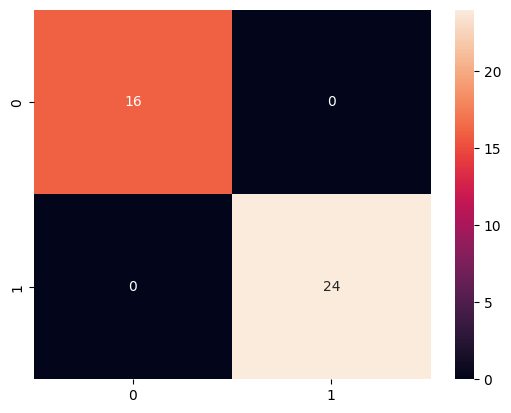

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True)

In [46]:
accuracy_score(y_test,y_pred)

1.0